<a href="https://colab.research.google.com/github/andydaehn/Global_Food_Prices/blob/main/World_Food_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Food Prices




This analysis will help predict the best drug to use for a particular patient, based on medical data from 200 patients, by classifying the patient to the drug profile.

## Import Libraries and Data

In [1]:
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report
import plotly.express as px
import plotly.graph_objects as go
import datetime

# Pretty display for notebooks
%matplotlib inline

# Ensure visualizations can be viewed by all
colorblind_seq = ['#8856a7', '#9ebcda','#de2d26']

In [3]:
# Imports for dashboards
import dash
from jupyter_dash import JupyterDash
from dash import html, dcc
from dash.dependencies import Input, Output
import plotly.graph_objects as go

In [4]:
congo_df = pd.read_csv('wfp_food_prices_cog.csv')

In [5]:
congo_df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2011-01-15,Brazzaville,Brazzaville,Mikalou,-4.259167,15.284722,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,635.0,0.994
2,2011-01-15,Brazzaville,Brazzaville,Moungali,-4.259167,15.284722,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,575.0,0.9
3,2011-01-15,Brazzaville,Brazzaville,Moungali,-4.259167,15.284722,pulses and nuts,Beans (white),KG,actual,Retail,XAF,1739.0,2.722
4,2011-01-15,Brazzaville,Brazzaville,Ouenzé,-4.2452176,15.2809247,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,595.0,0.9313


In [6]:
congo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4761 entries, 0 to 4760
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       4761 non-null   object
 1   admin1     4761 non-null   object
 2   admin2     4761 non-null   object
 3   market     4761 non-null   object
 4   latitude   4761 non-null   object
 5   longitude  4761 non-null   object
 6   category   4761 non-null   object
 7   commodity  4761 non-null   object
 8   unit       4761 non-null   object
 9   priceflag  4761 non-null   object
 10  pricetype  4761 non-null   object
 11  currency   4761 non-null   object
 12  price      4761 non-null   object
 13  usdprice   4761 non-null   object
dtypes: object(14)
memory usage: 520.9+ KB


In [7]:
congo_df.describe()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,4761,4761,4761,4761,4761,4761,4761,4761,4761,4761,4761,4761,4761,4761
unique,98,8,9,12,10,10,6,19,3,2,2,2,1228,1228
top,2018-03-15,Brazzaville,Brazzaville,Total,-4.259167,15.284722,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,800.0,1.2522
freq,82,1730,1730,1100,1522,1522,1893,494,4054,4760,4760,4760,193,193


In [10]:
congo_df = congo_df.drop([0])
# resetting the DataFrame index
congo_df.reset_index()

,index,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1,2011-01-15,Brazzaville,Brazzaville,Mikalou,-4.259167,15.284722,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,635.0,0.994
1,2,2011-01-15,Brazzaville,Brazzaville,Moungali,-4.259167,15.284722,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,575.0,0.9
2,3,2011-01-15,Brazzaville,Brazzaville,Moungali,-4.259167,15.284722,pulses and nuts,Beans (white),KG,actual,Retail,XAF,1739.0,2.722
3,4,2011-01-15,Brazzaville,Brazzaville,Ouenzé,-4.2452176,15.2809247,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,595.0,0.9313
4,5,2011-01-15,Brazzaville,Brazzaville,Ouenzé,-4.2452176,15.2809247,pulses and nuts,Beans (white),KG,actual,Retail,XAF,1507.0,2.3589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,4756,2020-07-15,Point-Noire,Pointe-Noire,Grand marché/Fond Ntié-Ntié/Nkouikou,-4.794722080230713,11.846111297607422,"meat, fish and eggs",Meat (beef),KG,actual,Retail,XAF,2500.0,3.9132
4756,4757,2020-07-15,Point-Noire,Pointe-Noire,Grand marché/Fond Ntié-Ntié/Nkouikou,-4.794722080230713,11.846111297607422,"meat, fish and eggs","Meat (chicken, frozen)",KG,actual,Retail,XAF,800.0,1.2522
4757,4758,2020-07-15,Point-Noire,Pointe-Noire,Grand marché/Fond Ntié-Ntié/Nkouikou,-4.794722080230713,11.846111297607422,oil and fats,Oil (palm),L,actual,Retail,XAF,850.0,1.3305
4758,4759,2020-07-15,Point-Noire,Pointe-Noire,Grand marché/Fond Ntié-Ntié/Nkouikou,-4.794722080230713,11.846111297607422,oil and fats,Oil (vegetable),L,actual,Retail,XAF,700.0,1.0957


In [11]:
congo_df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2011-01-15,Brazzaville,Brazzaville,Mikalou,-4.259167,15.284722,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,635.0,0.994
2,2011-01-15,Brazzaville,Brazzaville,Moungali,-4.259167,15.284722,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,575.0,0.9
3,2011-01-15,Brazzaville,Brazzaville,Moungali,-4.259167,15.284722,pulses and nuts,Beans (white),KG,actual,Retail,XAF,1739.0,2.722
4,2011-01-15,Brazzaville,Brazzaville,Ouenzé,-4.2452176,15.2809247,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,595.0,0.9313
5,2011-01-15,Brazzaville,Brazzaville,Ouenzé,-4.2452176,15.2809247,pulses and nuts,Beans (white),KG,actual,Retail,XAF,1507.0,2.3589


In [12]:
#congo_df = congo_df[['date','usdprice']]

In [13]:
# congo_df = congo_df.set_index('date')
# congo_df['date'] = pd.to_datetime(congo_df.Date, format='%Y-%m-%d')

In [16]:


congo_df['date'] = pd.to_datetime(congo_df['date'])
congo_df.groupby(pd.Grouper(key='date', axis=0, freq='M')).sum()

#congo_df.groupby(congo_df.date.dt.month)['usdprice'].sum()

,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
date,,,,,,,,,,,,,
2011-01-31,BrazzavilleBrazzavilleBrazzavilleBrazzavilleBr...,BrazzavilleBrazzavilleBrazzavilleBrazzavilleBr...,MikalouMoungaliMoungaliOuenzéOuenzéTotal,-4.259167-4.259167-4.259167-4.2452176-4.245217...,15.28472215.28472215.28472215.280924715.280924...,cereals and tuberscereals and tuberspulses and...,"Rice (mixed, low quality)Rice (mixed, low qual...",KGKGKGKGKGKG,actualactualactualactualactualactual,RetailRetailRetailRetailRetailRetail,XAFXAFXAFXAFXAFXAF,635.0575.01739.0595.01507.0514.0,0.9940.92.7220.93132.35890.8046
2011-02-28,BrazzavilleBrazzavilleBrazzavilleBrazzavilleBr...,BrazzavilleBrazzavilleBrazzavilleBrazzavilleBr...,MikalouMikalouMoungaliMoungaliMoungaliOuenzéOu...,-4.259167-4.259167-4.259167-4.259167-4.259167-...,15.28472215.28472215.28472215.28472215.2847221...,cereals and tuberscereals and tuberscereals an...,"Rice (mixed, low quality)Wheat flourRice (mixe...",KGKGKGKGKGKGKGKGKGKGKGKGKGKGKGKGKG,actualactualactualactualactualactualactualactu...,RetailRetailRetailRetailRetailRetailRetailReta...,XAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFX...,631.0633.0557.0604.01728.0562.0620.01723.0576....,0.98770.99080.87190.94542.70480.87970.97052.69...
2011-03-31,BrazzavilleBrazzavilleBrazzavilleBrazzavilleBr...,BrazzavilleBrazzavilleBrazzavilleBrazzavilleBr...,MikalouMikalouMoungaliMoungaliMoungaliOuenzéOu...,-4.259167-4.259167-4.259167-4.259167-4.259167-...,15.28472215.28472215.28472215.28472215.2847221...,cereals and tuberscereals and tuberscereals an...,"Rice (mixed, low quality)Wheat flourRice (mixe...",KGKGKGKGKGKGKGKGKGKGKGKGKGKGKGKGKG,actualactualactualactualactualactualactualactu...,RetailRetailRetailRetailRetailRetailRetailReta...,XAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFX...,654.0633.0550.0604.01355.0521.0620.01572.0551....,1.02370.99080.86090.94542.1210.81550.97052.460...
2011-04-30,BrazzavilleBrazzavilleBrazzavilleBrazzavilleBr...,BrazzavilleBrazzavilleBrazzavilleBrazzavilleBr...,MikalouMikalouMoungaliMoungaliMoungaliOuenzéOu...,-4.259167-4.259167-4.259167-4.259167-4.259167-...,15.28472215.28472215.28472215.28472215.2847221...,cereals and tuberscereals and tuberscereals an...,"Rice (mixed, low quality)Wheat flourRice (mixe...",KGKGKGKGKGKGKGKGKGKGKGKGKGKGKGKG,actualactualactualactualactualactualactualactu...,RetailRetailRetailRetailRetailRetailRetailReta...,XAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAF,662.0620.0581.0600.01428.0545.0600.0532.0590.0...,1.03620.97050.90940.93922.23520.85310.93920.83...
2011-05-31,BrazzavilleBrazzavilleBrazzavilleBrazzavilleBr...,BrazzavilleBrazzavilleBrazzavilleBrazzavilleBr...,MikalouMikalouMoungaliMoungaliMoungaliOuenzéOu...,-4.259167-4.259167-4.259167-4.259167-4.259167-...,15.28472215.28472215.28472215.28472215.2847221...,cereals and tuberscereals and tuberscereals an...,"Rice (mixed, low quality)Wheat flourRice (mixe...",KGKGKGKGKGKGKGKGKGKGKGKGKGKGKG,actualactualactualactualactualactualactualactu...,RetailRetailRetailRetailRetailRetailRetailReta...,XAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAF,701.0650.0575.0600.01524.0581.0614.0531.0596.0...,1.09731.01740.90.93922.38550.90940.96110.83120...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31,BouenzaBouenzaBouenzaBouenzaBouenzaBouenzaBoue...,NkayiNkayiNkayiNkayiNkayiNkayiNkayiNkayiNkayiN...,NkayiNkayiNkayiNkayiNkayiNkayiNkayiNkayiNkayiN...,-4.1828379-4.1828379-4.1828379-4.1828379-4.182...,13.286550413.286550413.286550413.286550413.286...,cereals and tuberscereals and tuberscereals an...,"BreadCassava (fresh)Cassava flourRice (mixed, ...",KGKGKGKGKGKGKGKGKGLLKGKGKGKGKGKGKGKGKGKGKGLLKG...,actualactualactualactualactualactualactualactu...,RetailRetailRetailRetailRetailRetailRetailReta...,XAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFXAFX...,1194.0502.0544.0730.03055.04500.03288.02500.01...,1.86890.78580.85151.14274.78197.04385.14663.91...
2020-04-30,BouenzaBouenzaBouenzaBouenzaBouenzaBo

In [17]:
congo_df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2011-01-15,Brazzaville,Brazzaville,Mikalou,-4.259167,15.284722,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,635.0,0.994
2,2011-01-15,Brazzaville,Brazzaville,Moungali,-4.259167,15.284722,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,575.0,0.9
3,2011-01-15,Brazzaville,Brazzaville,Moungali,-4.259167,15.284722,pulses and nuts,Beans (white),KG,actual,Retail,XAF,1739.0,2.722
4,2011-01-15,Brazzaville,Brazzaville,Ouenzé,-4.2452176,15.2809247,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,595.0,0.9313
5,2011-01-15,Brazzaville,Brazzaville,Ouenzé,-4.2452176,15.2809247,pulses and nuts,Beans (white),KG,actual,Retail,XAF,1507.0,2.3589


In [28]:
fig = px.line(congo_df, x='date', y='usdprice')
fig.show()

In [20]:
congo_df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2011-01-15,Brazzaville,Brazzaville,Mikalou,-4.259167,15.284722,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,635.0,0.994
2,2011-01-15,Brazzaville,Brazzaville,Moungali,-4.259167,15.284722,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,575.0,0.9
3,2011-01-15,Brazzaville,Brazzaville,Moungali,-4.259167,15.284722,pulses and nuts,Beans (white),KG,actual,Retail,XAF,1739.0,2.722
4,2011-01-15,Brazzaville,Brazzaville,Ouenzé,-4.2452176,15.2809247,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,595.0,0.9313
5,2011-01-15,Brazzaville,Brazzaville,Ouenzé,-4.2452176,15.2809247,pulses and nuts,Beans (white),KG,actual,Retail,XAF,1507.0,2.3589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4756,2020-07-15,Point-Noire,Pointe-Noire,Grand marché/Fond Ntié-Ntié/Nkouikou,-4.794722080230713,11.846111297607422,"meat, fish and eggs",Meat (beef),KG,actual,Retail,XAF,2500.0,3.9132
4757,2020-07-15,Point-Noire,Pointe-Noire,Grand marché/Fond Ntié-Ntié/Nkouikou,-4.794722080230713,11.846111297607422,"meat, fish and eggs","Meat (chicken, frozen)",KG,actual,Retail,XAF,800.0,1.2522
4758,2020-07-15,Point-Noire,Pointe-Noire,Grand marché/Fond Ntié-Ntié/Nkouikou,-4.794722080230713,11.846111297607422,oil and fats,Oil (palm),L,actual,Retail,XAF,850.0,1.3305
4759,2020-07-15,Point-Noire,Pointe-Noire,Grand marché/Fond Ntié-Ntié/Nkouikou,-4.794722080230713,11.846111297607422,oil and fats,Oil (vegetable),L,actual,Retail,XAF,700.0,1.0957


In [23]:
print(congo_df['date'].head(100))

1     2011-01-15
2     2011-01-15
3     2011-01-15
4     2011-01-15
5     2011-01-15
         ...    
96    2011-08-15
97    2011-08-15
98    2011-08-15
99    2011-08-15
100   2011-08-15
Name: date, Length: 100, dtype: datetime64[ns]


In [ ]:
# Creating an object using groupby
grouped = df.groupby('Degree')
  
# the return type of the object 'grouped' is 
# pandas.core.groupby.generic.DataFrameGroupBy.
  
# Creating a dataframe from the object using get_group().
# dataframe of students with Degree as MBA.
df_grouped = grouped.get_group('MBA')


# Creating another object using groupby
grouped2 = df.groupby('Score')
  
# the return type of the object 'grouped2' is 
# pandas.core.groupby.generic.DataFrameGroupBy.
  
# Creating a dataframe from the object 
# using get_group() dataframe of students
# with Score = 90
df_grouped2 = grouped2.get_group(90)
  
print(df_grouped2)

congo_grp = congo_df.groupby('category')

grouped_df = grouped.get_group('cereals and tubers')

congo_group2 = congo_df.groupby('price')

congo_group2 = congo_group2.get_group




In [19]:
nga_df = pd.read_csv('wfp_food_prices_nga.csv')

In [20]:
nga_df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,0.4198
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,0.3584
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.7,0.8561
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,0.3714


In [21]:
nga_df['category'].unique()

array(['#item+type', 'cereals and tubers', 'pulses and nuts', 'non-food',
       'oil and fats', 'meat, fish and eggs', 'milk and dairy',
       'vegetables and fruits', 'miscellaneous food'], dtype=object)

In [22]:
eth_df = pd.read_csv('wfp_food_prices_eth.csv')
eth_df.head()
eth_df['category'].unique()

array(['#item+type', 'cereals and tubers', 'pulses and nuts',
       'milk and dairy', 'miscellaneous food', 'non-food',
       'meat, fish and eggs', 'oil and fats', 'vegetables and fruits'],
      dtype=object)

In [23]:
afg_df = pd.read_csv('wfp_food_prices_afg.csv')
afg_df.head()
afg_df['category'].unique()

array(['#item+type', 'non-food', 'cereals and tubers',
       'meat, fish and eggs', 'miscellaneous food', 'oil and fats',
       'pulses and nuts'], dtype=object)

In [24]:
yem_df = pd.read_csv('wfp_food_prices_yem.csv')
yem_df.head()
yem_df['category'].unique()

array(['#item+type', 'cereals and tubers', 'miscellaneous food',
       'oil and fats', 'pulses and nuts', 'vegetables and fruits',
       'meat, fish and eggs', 'non-food'], dtype=object)

In [8]:
congo_slice = {}

for cat in congo_df['category'].unique():

    congo_slice[cat] = congo_df[  congo_df['category'] == cat ]

In [9]:
congo_df.head()

,index,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1,2011-01-15,Brazzaville,Brazzaville,Mikalou,-4.259167,15.284722,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,635.0,0.994
1,2,2011-01-15,Brazzaville,Brazzaville,Moungali,-4.259167,15.284722,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,575.0,0.9
2,3,2011-01-15,Brazzaville,Brazzaville,Moungali,-4.259167,15.284722,pulses and nuts,Beans (white),KG,actual,Retail,XAF,1739.0,2.722
3,4,2011-01-15,Brazzaville,Brazzaville,Ouenzé,-4.2452176,15.2809247,cereals and tubers,"Rice (mixed, low quality)",KG,actual,Retail,XAF,595.0,0.9313
4,5,2011-01-15,Brazzaville,Brazzaville,Ouenzé,-4.2452176,15.2809247,pulses and nuts,Beans (white),KG,actual,Retail,XAF,1507.0,2.3589


In [15]:
congo_df['category'].unique()

array(['cereals and tubers', 'pulses and nuts', 'meat, fish and eggs',
       'oil and fats', 'vegetables and fruits'], dtype=object)

In [6]:
#congo_df['Date'] = pd.to_datetime(congo_df.Year.astype(str) + '/' + congo_df.Month.astype(str) + '/01')

#df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']]


In [11]:
#congo_df.drop(congo_df[['Year','Month']],axis=1,inplace=True)

In [17]:
# #Finding the mean of the column having NaN
# mean_value=congo_df['Price'].mean()
  
# # Replace NaNs in column S2 with the
# # mean of values in the same column
# congo_df['Price'].fillna(value=mean_value, inplace=True)

In [11]:
fig = px.line(congo_df, x='date', y='price')
fig.show()

In [ ]:
# Histograms for univariate analysis
for col in congo_df:
    fig = px.histogram(x = congo_df[col],
                       title='Histogram for {}'.format(col),
                       labels={'x':col},
                       nbins=30,
                       color_discrete_sequence=colorblind_seq,
                       width=700,
                       height=500)

    fig.show()

In [ ]:
df_corr = congo_df.corr() # Generate correlation matrix

fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr)
    )
)


In [ ]:
#Finding the mean of the column having NaN
mean_value=congo_df['Price'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
congo_df['Price'].fillna(value=mean_value, inplace=True)

In [ ]:
fig = px.histogram(x = congo_df['Price'],
                   title='Histogram for {}'.format('Price'),
                   labels={'x':'Price'},
                   nbins=30,
                   color_discrete_sequence=colorblind_seq,
                   width=700,
                   height=500)

fig.show()

In [ ]:
print(mean_value)

638.1232291666666


In [ ]:
congo_df['Price']

0      579.75
1      546.00
2      552.29
3      592.15
4      574.71
        ...  
110    762.60
111    749.80
112    798.00
113    778.40
114    738.60
Name: Price, Length: 115, dtype: float64

## Exploratory Data Analysis

### Analysis of Numerical Features

Text(0.5, 1.0, 'Distribution of Price')

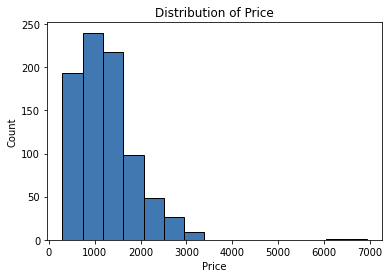

In [ ]:
# # Plot numerical column
# for col in congo_df:
#     plt.figure()
#     sns.histplot(data=congo_df,x=col,bins=15,color=hex_color)
#     plt.title(f"Distribution of {col}")
#     print('\n')
plt.figure()
sns.histplot(data=congo_df,x=congo_df['Price'],bins=15,color=hex_color)
plt.title(f"Distribution of Price")

In [ ]:
# for x in congo_df['Price']:
#     if x >= 4000:


# [congo_df['Price'].iloc[x] == 0 for x in congo_df['Price'] if x > 4000]

congo_df['Price'] = congo_df['Price'] <= 4000
congo_df['Price'].count()


935

Text(0.5, 1.0, 'Distribution of Price')

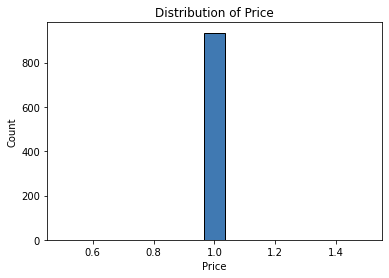

In [ ]:
plt.figure()
sns.histplot(data=congo_df,x=congo_df['Price'],bins=15,color=hex_color)
plt.title(f"Distribution of Price")

In [ ]:
# Combine all columns into list
explore_cols = explore_df.columns.to_list()
explore_cols

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']

In [ ]:
!pip install jupyter-dash;

In [ ]:
# # Build App
# app = JupyterDash(__name__)
# app.layout = html.Div([
#     html.H1('Feature Analysis'),
#     dcc.Graph(id='graph'),
#     html.Label([
#         "colorscale",
#         dcc.Dropdown(
#             id='colorscale-dropdown', clearable=False,
#             value='plasma', options=[
#                 {'label': c, 'value': c}
#                 for c in px.colors.named_colorscales()
#             ])
#     ]),
# ])
# # Define callback to update graph
# @app.callback(
#     Output('graph', 'figure'),
#     [Input("colorscale-dropdown", "value")]
# )
# def update_figure(colorscale):
#     return px.scatter(
#         df, x="total_bill", y="tip", color="size",
#         color_continuous_scale=colorscale,
#         render_mode="webgl", title="Tips"
#     )
# # Run app and display result inline in the notebook
# app.run_server(mode='inline')

In [ ]:
explore_df.count()

Age            200
Sex            200
BP             200
Cholesterol    200
Na_to_K        200
Drug           200
dtype: int64

In [ ]:
import dash
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.express as px

# Load Data
#df = px.data.tips()
# Build App
app = JupyterDash(__name__)
df = explore_df


app.layout = html.Div(id = 'parent', children = [
    html.H1(id = 'H1', children = 'Feature Analysis', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),

        dcc.Dropdown( id = 'dropdown',
        options = [{'label':'Google', 'value':'GOOG' },
                   {'label': 'Apple', 'value':'AAPL'},
                   {'label': 'Amazon', 'value':'AMZN'},],
        value = 'Age'),
        dcc.Graph(id = 'bar_plot')
    ])
    
    
@app.callback(Output(component_id='bar_plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
def graph_update(dropdown_value):
    print(dropdown_value)
    fig = go.Figure([go.Histogram(explore_df, x = df['{}'.format(dropdown_value)])])
    
    fig.update_layout(title = 'Initial distributions',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Count'
                      )
    return fig  

# Run app and display result inline in the notebook
app.run_server(mode='inline')

# app = Dash(__name__)

# app.layout = html.Div([
#     dcc.Graph(id='graph-with-slider'),
#     dcc.Slider(
#         df['year'].min(),
#         df['year'].max(),
#         step=None,
#         value=df['year'].min(),
#         marks={str(year): str(year) for year in df['year'].unique()},
#         id='year-slider'
#     )
# ])


# @app.callback(
#     Output('graph-with-slider', 'figure'),
#     Input('year-slider', 'value'))
# def update_figure(selected_year):
#     filtered_df = df[df.year == selected_year]

#     fig = px.scatter(filtered_df, x="gdpPercap", y="lifeExp",
#                      size="pop", color="continent", hover_name="country",
#                      log_x=True, size_max=55)

#     fig.update_layout(transition_duration=500)

#     return fig


<IPython.core.display.Javascript object>

**Inference:** Na_to_k has a positive skew. Check skewness and kurtosis of Na_to_K

In [ ]:
# Skewness
print("Skewness: %f" % explore_df['Na_to_K'].skew())

Skewness: 1.039341


**Inference**: Drug Y is widely used compared to other drugs.

### Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 49.5% of the points cannot be placed; y

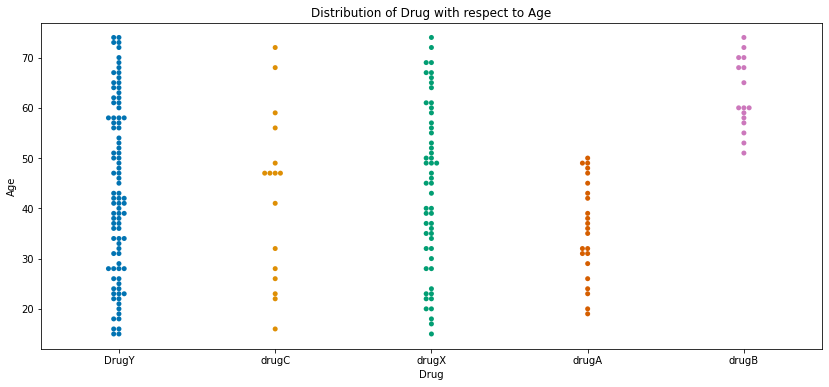

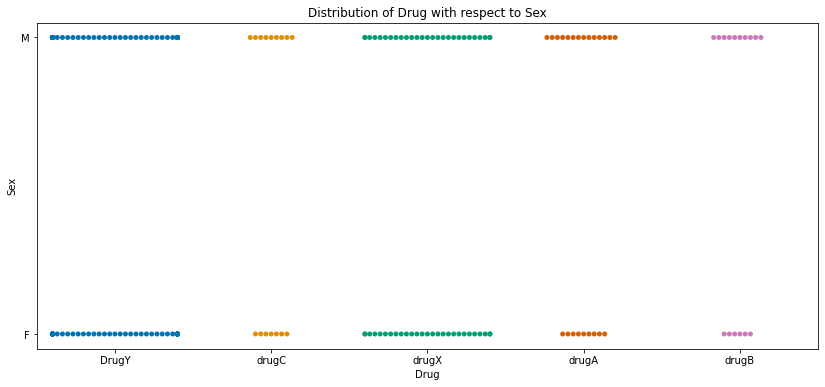

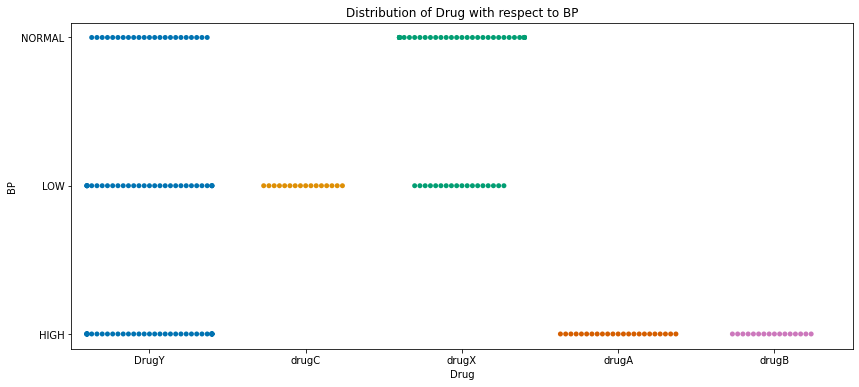

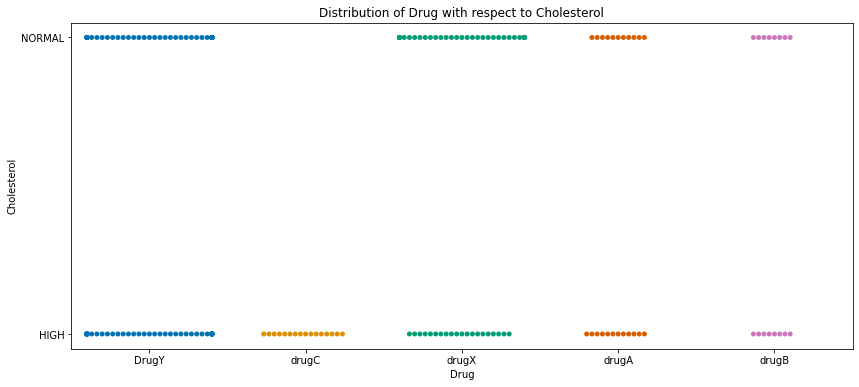

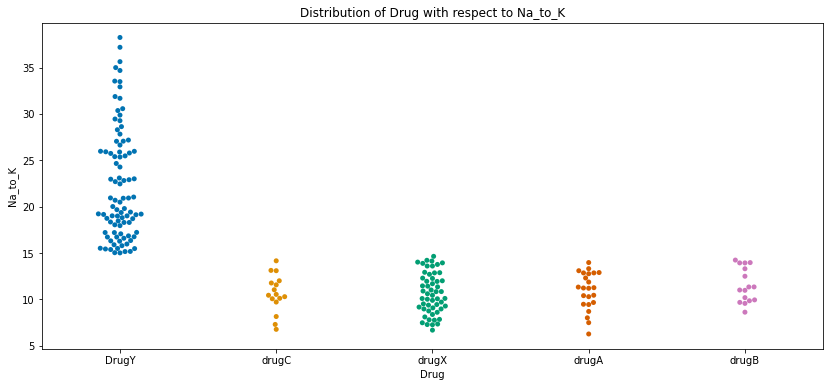

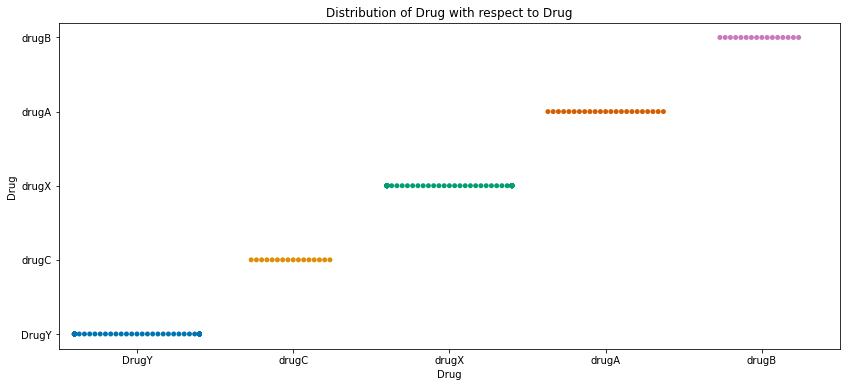

In [ ]:
# Bivariate for numerical columns
for col in explore_cols:
    plt.figure(figsize=(14,6))
    sns.swarmplot(data=explore_df,x='Drug',y=col,palette=vis_color)
    plt.title(f"Distribution of Drug with respect to {col}")

**Inference:** Age may have a correlation with drugA and drugB. Na_to_K appears to have a high correlation to drugY.

### Multivariate Analysis

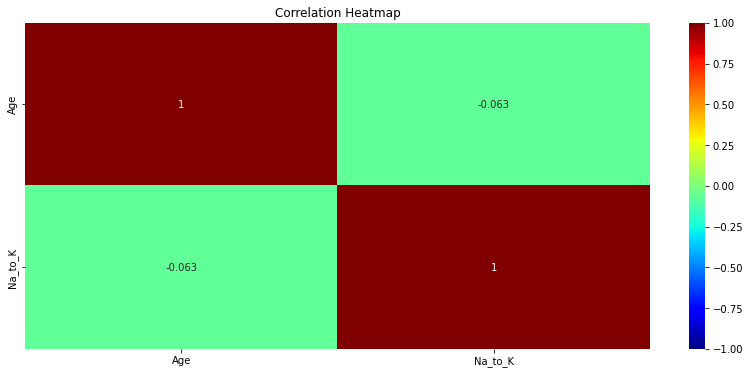

In [ ]:
# Create correlation matrix
plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(explore_df.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap_color)
heatmap.set_title('Correlation Heatmap');

In [ ]:
explore_df.columns


Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
# target_cols = ['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']
# feat_cols = ['Age', 'Na_to_K', 'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW', 'BP_NORMAL','Cholesterol_HIGH', 'Cholesterol_NORMAL']

# for col in feat_cols:
#     # View the distrubution of drug compared with Na_to_K and BP
#     plt.figure(figsize=(14,6))
#     sns.barplot(x=target_cols,y=explore_df[col],palette=vis_color)
#     plt.title('Distribution of Drug with respect to Na_to_K and Blood Pressure')

In [ ]:
# for col in feat_cols:
#     # View the distrubution of drug compared with Na_to_K and BP
#     plt.figure(figsize=(14,6))
#     sns.swarmplot(data=explore_df,x=target_cols,y=col,hue='BP',palette=vis_color)
#     plt.title('Distribution of Drug with respect to Na_to_K and Blood Pressure')

## Data Wrangling


In [ ]:
# # Handle the skewness in Na_to_K
# print('The original skewness of Na_to_K')
# print("Skewness: %f" % explore_df['Na_to_K'].skew())

# print('\n')

# # Use square root to adjust the skewness
# explore_df['Na_to_K'] = np.sqrt(explore_df['Na_to_K'])

# #Plot new
# plt.figure(figsize=(14,6))
# sns.histplot(data=explore_df,x='Na_to_K',bins=15,color=hex_color)
# plt.title(f"New Distribution of Na_to_K")

# print('The new skewness of Na_to_K')
# print("Skewness: %f" % explore_df['Na_to_K'].skew())

In [ ]:
# Make age into 7 groups
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
explore_df['Age_binned'] = pd.cut(explore_df['Age'], bins=bin_age, labels=category_age)
df_drug = explore_df.drop(['Age'], axis = 1)

In [ ]:
# Make Na_to_K into 5 groups
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
explore_df['Na_to_K_binned'] = pd.cut(explore_df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
explore_df = explore_df.drop(['Na_to_K'], axis = 1)

In [ ]:
# Split data into features and target
y_df = explore_df['Drug']
X_df = explore_df.drop(['Drug'],axis=1)


,Age,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned
0,23,F,HIGH,HIGH,20s,20-30
1,47,M,LOW,HIGH,40s,10-20
2,47,M,LOW,HIGH,40s,10-20
3,28,F,NORMAL,HIGH,20s,<10
4,61,F,LOW,HIGH,60s,10-20
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,50s,10-20
196,16,M,LOW,HIGH,<20s,10-20
197,52,M,NORMAL,HIGH,50s,10-20
198,23,M,NORMAL,NORMAL,20s,10-20


## Split, Encode, Train, and Test the Data

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=22)

In [ ]:
# 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
# SMOTE to correct DrugY having more than the others
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [ ]:
# Train the data on the Random Forest Classifier and test the accuracy
rfc = RandomForestClassifier(max_leaf_nodes=15)
rfc.fit(X_train,y_train)

# Making predictions
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# Get Scores
print('Results for Random Forest Classifier')
print('F1 Score: ', round(f1_score(y_test, y_test_pred, average='weighted')*100,2),'%')
print(classification_report(y_test,y_test_pred))

Results for Random Forest Classifier
F1 Score:  85.66 %
              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        20
       drugA       0.70      1.00      0.82         7
       drugB       1.00      1.00      1.00         4
       drugC       0.33      1.00      0.50         1
       drugX       0.89      1.00      0.94         8

    accuracy                           0.85        40
   macro avg       0.78      0.94      0.82        40
weighted avg       0.91      0.85      0.86        40



In [ ]:
# Train the data on the Decision Tree Classifier and test the accuracy
dtc = DecisionTreeClassifier(max_leaf_nodes=30)
dtc.fit(X_train,y_train)

# Making predictions
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

# Get Scores
print('Results for Decision Tree Classifier')
print('F1 Score: ', round(f1_score(y_test, y_test_pred, average='weighted')*100,2),'%')
print(classification_report(y_test,y_test_pred))

Results for Decision Tree Classifier
F1 Score:  83.35 %
              precision    recall  f1-score   support

       DrugY       0.84      0.80      0.82        20
       drugA       0.86      0.86      0.86         7
       drugB       1.00      0.75      0.86         4
       drugC       0.33      1.00      0.50         1
       drugX       0.88      0.88      0.88         8

    accuracy                           0.82        40
   macro avg       0.78      0.86      0.78        40
weighted avg       0.85      0.82      0.83        40

